In [14]:
import argparse
from stable_baselines3.common.utils import set_random_seed
from tqdm import tqdm
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import torch
import logging
import datetime
import matplotlib.pyplot as plt


In [48]:

config = {}
config["num_transitions"] = 250
config["num_sprites"] = 2
config["all_sprite_mover"] = True
config["random_init_places"] = False

In [49]:
data_name = "transition_data/{}transitions_{}_{}_{}.npz".format(config["num_transitions"],config["num_sprites"],("all_sprite_mover"if config["all_sprite_mover"] else "one_sprite_mover" if config["one_sprite_mover"] else "select_move"),config["random_init_places"])
dataset = np.load(data_name)


In [50]:
first = dataset["states"][40]

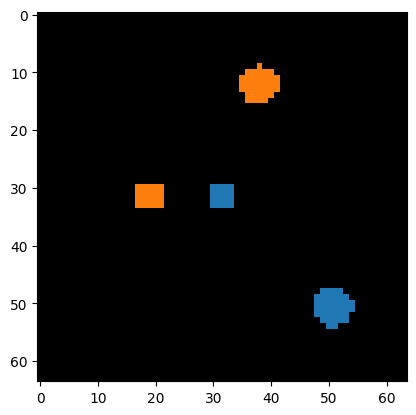

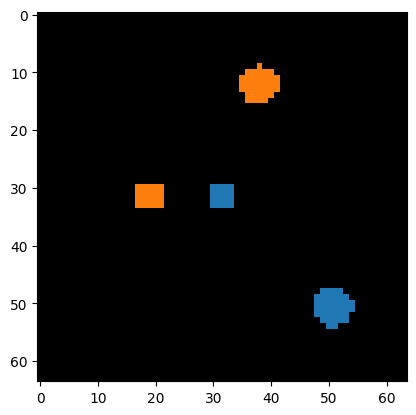

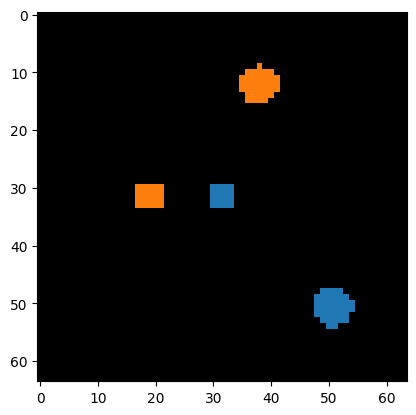

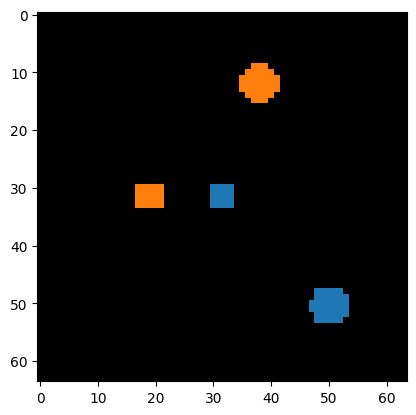

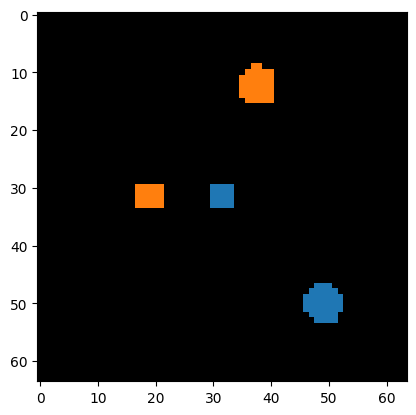

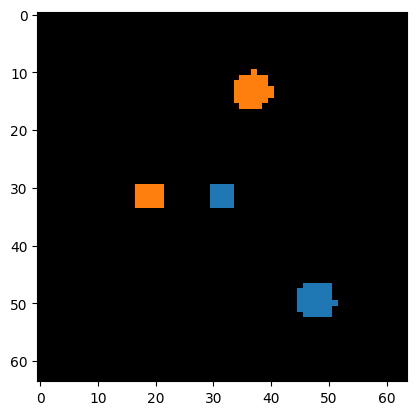

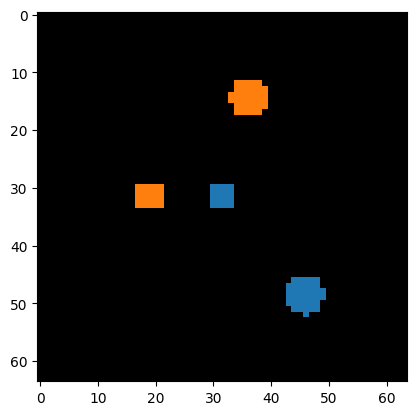

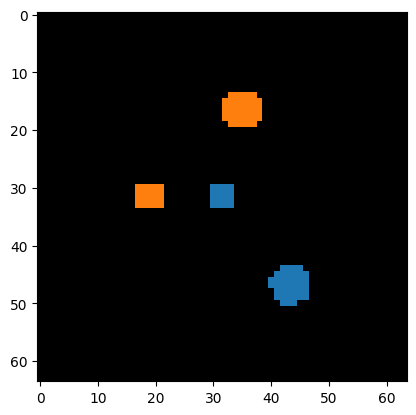

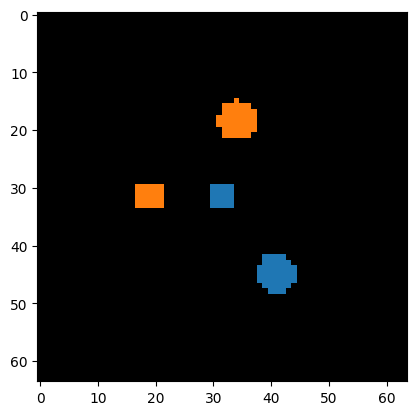

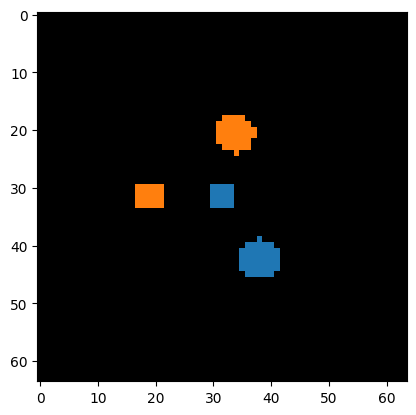

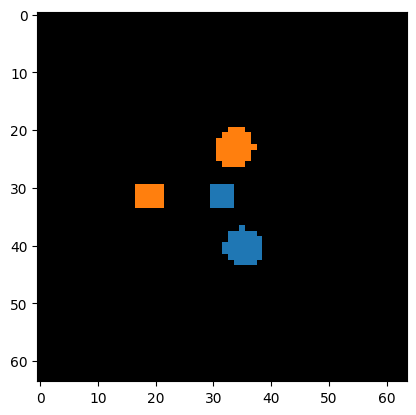

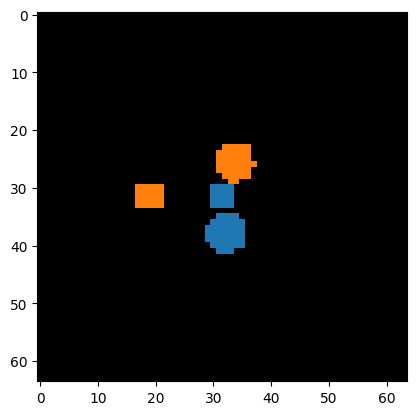

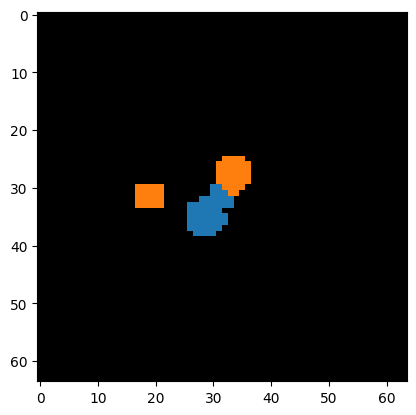

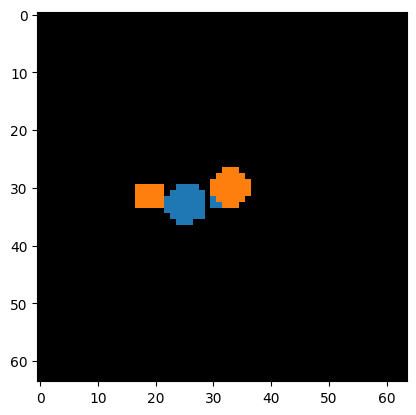

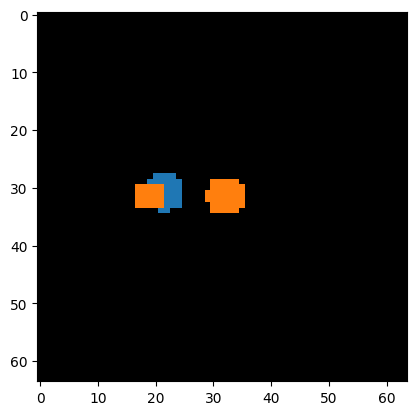

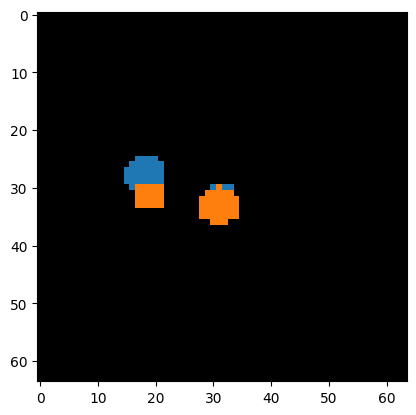

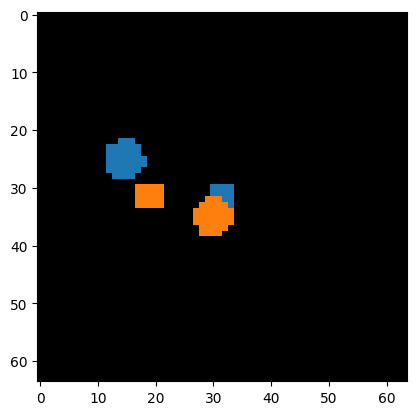

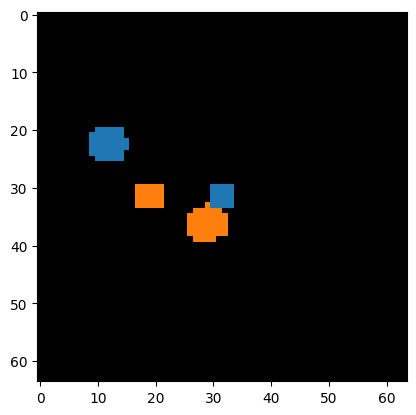

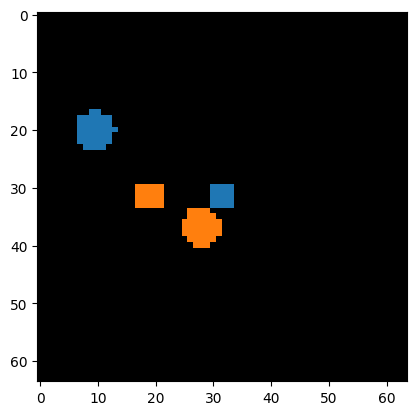

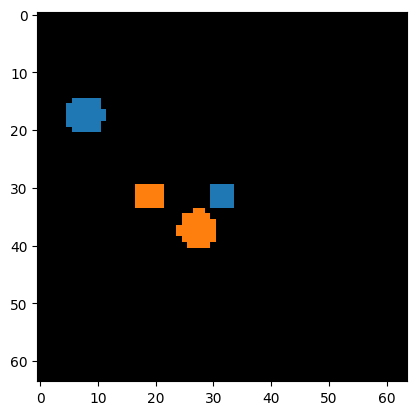

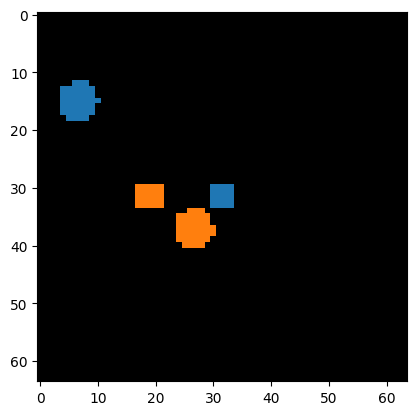

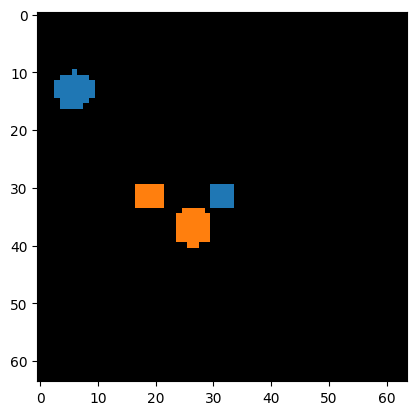

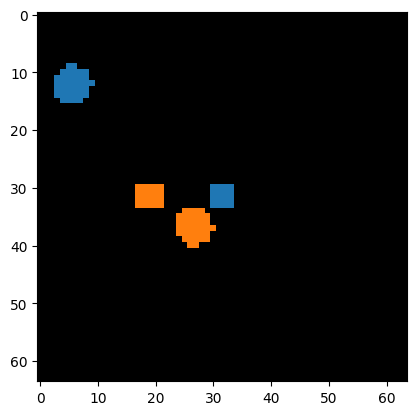

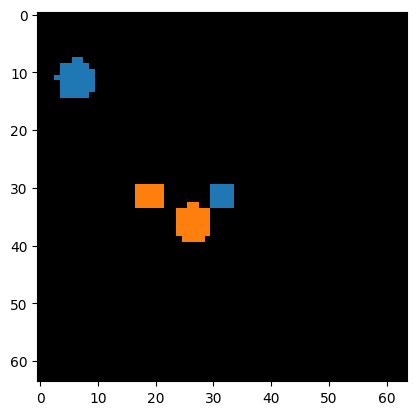

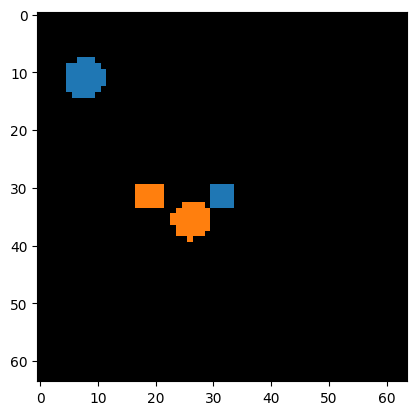

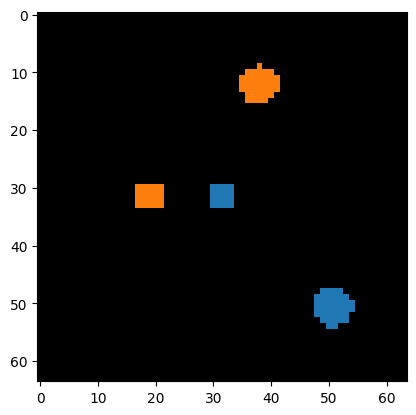

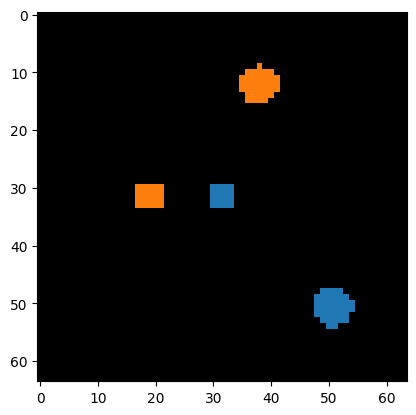

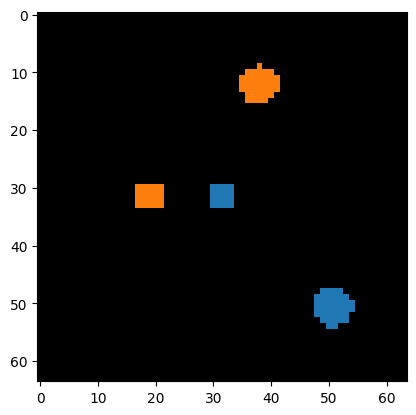

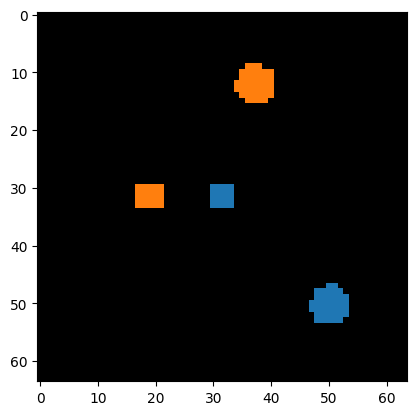

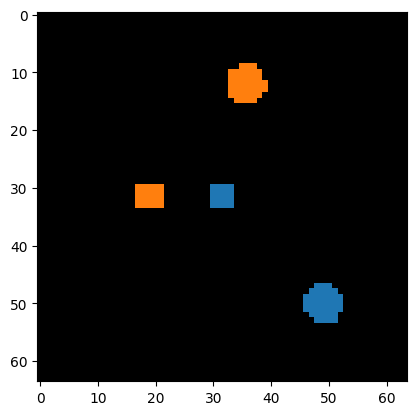

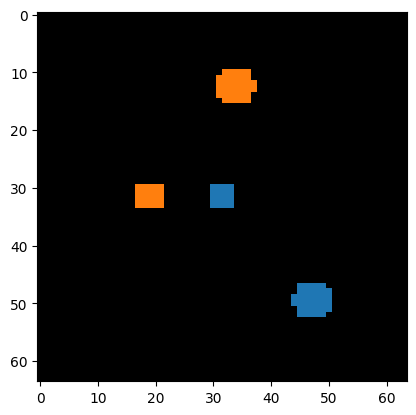

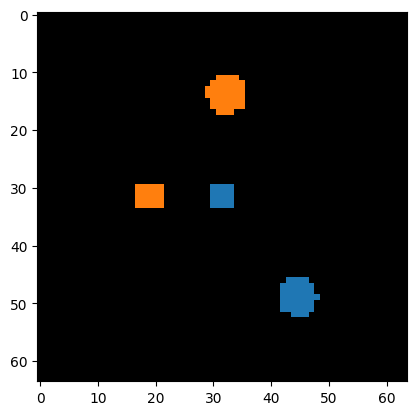

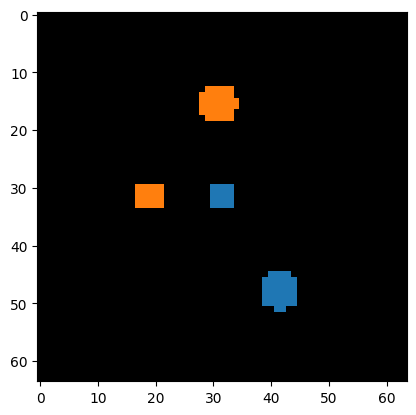

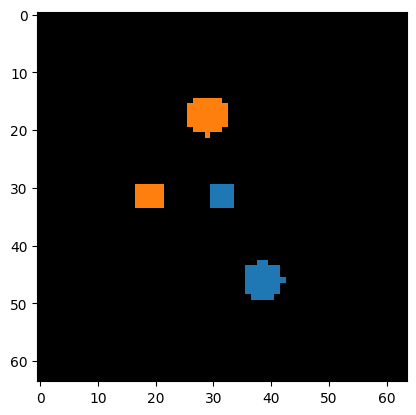

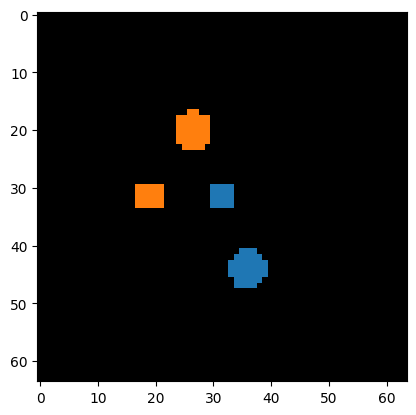

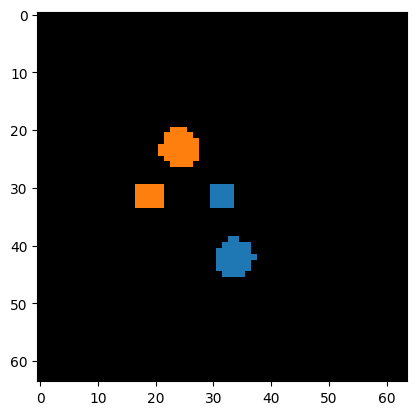

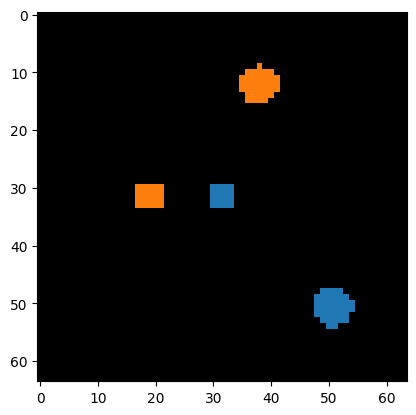

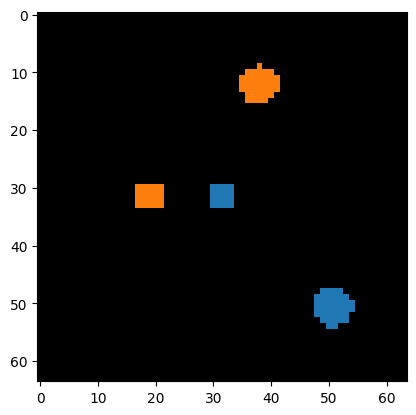

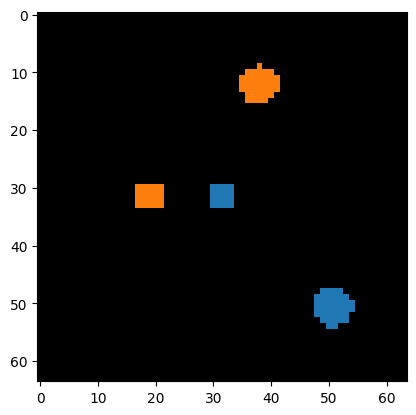

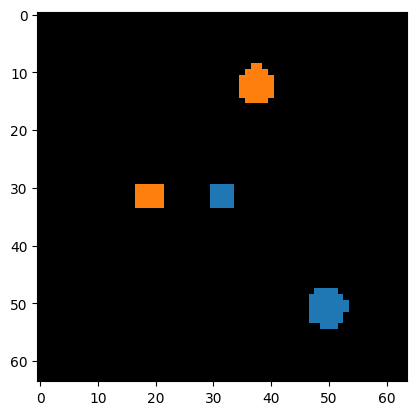

In [51]:
for i in range(40):
    plt.imshow(dataset["states"][i][0])
    plt.show()

In [47]:
state_actions = np.concatenate((dataset["states"],dataset["actions"]),axis=1)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 5 dimension(s) and the array at index 1 has 2 dimension(s)

In [ ]:
tensor_dataset = TensorDataset(torch.from_numpy(state_actions).float(),torch.from_numpy(dataset["next_states"]).float())
train_dataset, val_dataset = torch.utils.data.random_split(tensor_dataset, [int(len(tensor_dataset)*0.8), len(tensor_dataset)-int(len(tensor_dataset)*0.8)])
